¿Cómo se podría utilizar un algoritmo para el problema de decisión del coloreado de grafos para determinar el número cromático de un grafo?"
Dado que esta es una pregunta conceptual sobre la relación entre un problema de decisión (si un grafo puede ser coloreado con $k$ colores) y un problema de optimización (encontrar el número cromático $\chi(G)$), no requiere un código QUBO. Sin embargo, se puede explicar el principio y mostrar cómo se traduce a un algoritmo.

Algoritmo para Determinar el Número Cromático ($\chi(G)$)
El número cromático $\chi(G)$ de un grafo $G$ es el mínimo número de colores necesarios para colorear sus vértices de manera que dos vértices adyacentes nunca tengan el mismo color.Un algoritmo de decisión para el coloreado de grafos ($k$-Coloreado) es un algoritmo que toma un grafo $G$ y un entero $k$, y responde SÍ o NO a la pregunta: "¿Puede $G$ colorearse con $k$ colores?".El $\chi(G)$ se puede determinar utilizando repetidamente un algoritmo de decisión de $k$-Coloreado mediante una búsqueda binaria o secuencial sobre el número de colores $k$.

**1. Búsqueda Secuencial (Simple)**
Este es el método más directo, aunque lento si $\chi(G)$ es grande.Límite Inferior ($k_{min}$): Comienza con $k=2$ (ya que un grafo con al menos una arista no puede tener $\chi(G)=1$).Límite Superior ($k_{max}$): El límite superior es $|V|$ (el número de vértices, ya que siempre puedes colorear cada vértice con un color diferente).

Proceso:
Para $k = 2, 3, 4, \dots, N$:
Ejecuta el algoritmo de decisión $k$-Coloreado en $G$.Si la respuesta es SÍ, entonces $k$ es el menor número de colores con el que $G$ puede ser coloreado.El número cromático $\chi(G)$ es $k$. Termina el proceso.Si la respuesta es NO, incrementa $k$ y repite.

2. Algoritmo Basado en Búsqueda Binaria
Para mejorar la eficiencia, se puede utilizar la búsqueda binaria en el rango de posibles colores $[k_{min}, k_{max}]$:Inicialización: Establece $k_{min} = 1$ y $k_{max} = |V|$.Iteración: Mientras $k_{min} \le k_{max}$:Elige un punto medio: $k_{mid} = \lfloor (k_{min} + k_{max}) / 2 \rfloor$.Ejecuta el algoritmo de decisión $k_{mid}$-Coloreado en $G$.Si SÍ (es $k_{mid}$-coloreable): El número cromático puede ser $k_{mid}$ o menos. Almacena $k_{mid}$ como la mejor solución encontrada y reduce el límite superior: $k_{max} = k_{mid} - 1$.Si NO (no es $k_{mid}$-coloreable): El número cromático debe ser mayor que $k_{mid}$. Aumenta el límite inferior: $k_{min} = k_{mid} + 1$.Resultado: El último $k$ que devolvió SÍ es el número cromático $\chi(G)$.

In [1]:
!pip install networkx

In [2]:
import networkx as nx

# --- FUNCIÓN DE DECISIÓN CONCEPTUAL (Se asume que existe) ---
# En la práctica, esta función sería un algoritmo NP-duro (p. ej., un QUBO solver)
# que intenta encontrar un coloreado válido.
def k_coloreable(G, k):
    """
    Función de decisión: Devuelve True si el grafo G puede colorearse con k colores.
    NOTA: En un entorno real, esta es una función NP-duro y compleja.
    Aquí se simula una solución simple para un grafo conocido.
    """
    # Ejemplo para un grafo C4 (ciclo de 4): chi(G) = 2
    if G.number_of_nodes() == 4 and G.number_of_edges() == 4:
        return k >= 2
    # Ejemplo para un grafo K4 (completo de 4): chi(G) = 4
    if G.number_of_nodes() == 4 and G.number_of_edges() == 6:
        return k >= 4

    # Usar el conocimiento de NetworkX para colorear (esto no sería parte del algoritmo de decisión)
    try:
        # Esto solo funciona para grafos pequeños o especiales
        coloring = nx.coloring.greedy_color(G, strategy='largest_first')
        return k >= len(set(coloring.values()))
    except Exception:
        # Si el algoritmo de decisión real fallara o no pudiera encontrar una respuesta
        return False


# --- ALGORITMO DE OPTIMIZACIÓN BASADO EN DECISIÓN ---
def encontrar_numero_cromatico(G):
    N = G.number_of_nodes()

    # 1. Definir los límites de búsqueda [1, N]
    k_min = 1
    k_max = N
    chi_G = N # Inicializamos con el peor caso (número de vértices)

    print(f"Buscando Chi(G) en el rango [1, {N}] usando Búsqueda Binaria...")

    # 2. Búsqueda Binaria en el número de colores (k)
    while k_min <= k_max:
        k_mid = (k_min + k_max) // 2

        print(f"  -> Probando con k = {k_mid} colores...")

        # Usar el algoritmo de decisión
        if k_coloreable(G, k_mid):
            # Sí es coloreable con k_mid. Intentamos con menos colores.
            chi_G = k_mid
            k_max = k_mid - 1
            print(f"    [SÍ] {k_mid}-coloreable. Reduciendo límite a {k_max}")
        else:
            # No es coloreable con k_mid. Necesitamos más colores.
            k_min = k_mid + 1
            print(f"    [NO] {k_mid}-coloreable. Aumentando límite a {k_min}")

    return chi_G


# --- EJECUCIÓN DEL EJEMPLO ---

# Grafo 1: Cycle Graph C4 (Ciclo de 4) -> Chi(G) = 2
G1 = nx.cycle_graph(4)
print("\n######################################")
print("##### Ejemplo 1: Grafo Ciclo (C4) #####")
chi1 = encontrar_numero_cromatico(G1)
print(f"\nNúmero Cromático (Chi(G)) final: {chi1}")


# Grafo 2: Complete Graph K4 (Completo de 4) -> Chi(G) = 4
G2 = nx.complete_graph(4)
print("\n######################################")
print("##### Ejemplo 2: Grafo Completo (K4) #####")
chi2 = encontrar_numero_cromatico(G2)
print(f"\nNúmero Cromático (Chi(G)) final: {chi2}")


######################################
##### Ejemplo 1: Grafo Ciclo (C4) #####
Buscando Chi(G) en el rango [1, 4] usando Búsqueda Binaria...
  -> Probando con k = 2 colores...
    [SÍ] 2-coloreable. Reduciendo límite a 1
  -> Probando con k = 1 colores...
    [NO] 1-coloreable. Aumentando límite a 2

Número Cromático (Chi(G)) final: 2

######################################
##### Ejemplo 2: Grafo Completo (K4) #####
Buscando Chi(G) en el rango [1, 4] usando Búsqueda Binaria...
  -> Probando con k = 2 colores...
    [NO] 2-coloreable. Aumentando límite a 3
  -> Probando con k = 3 colores...
    [NO] 3-coloreable. Aumentando límite a 4
  -> Probando con k = 4 colores...
    [SÍ] 4-coloreable. Reduciendo límite a 3

Número Cromático (Chi(G)) final: 4


El algoritmo trabaja iterativamente acotando el rango de posibles colores $[k_{min}, k_{max}]$ hasta que $k_{min} > k_{max}$. El último valor de $k$ para el que el grafo fue SÍ coloreable es el $\chi(G)$.Explicación del Ejemplo 1: Grafo Ciclo ($C_4$)El grafo $C_4$ es un ciclo de 4 vértices. Su número cromático ($\chi(C_4)$) es 2, ya que es bipartito (se puede colorear con dos colores alternando).Proceso de Búsqueda Binaria:Inicio: Rango $[k_{min}, k_{max}] = [1, 4]$. $\chi(G)$ actual = 4.Prueba 1: $k=2$ (Punto medio de $[1, 4]$)Decisión: $\rightarrow$ [SÍ] 2-coloreable.Actualización: Como 2 funciona, la solución podría ser 2 o menos.$\chi(G)$ se actualiza a 2.El límite superior se reduce: $k_{max} = 2 - 1 = 1$.Prueba 2: $k=1$ (Punto medio de $[1, 1]$)Decisión: $\rightarrow$ [NO] 1-coloreable. (Un grafo con aristas no puede colorearse con 1 color).Actualización: Como 1 no funciona, la solución debe ser mayor.El límite inferior se aumenta: $k_{min} = 1 + 1 = 2$.Fin: La condición de parada es $k_{min} (2) > k_{max} (1)$.Resultado Final: El último valor de $k$ que devolvió SÍ fue 2. $\chi(G) = \mathbf{2}$.Explicación del Ejemplo 2: Grafo Completo ($K_4$)El grafo $K_4$ es un grafo completo de 4 vértices (cada vértice está conectado a todos los demás). Su número cromático ($\chi(K_4)$) es 4, ya que cada vértice adyacente requiere un color diferente.Proceso de Búsqueda Binaria:Inicio: Rango $[k_{min}, k_{max}] = [1, 4]$. $\chi(G)$ actual = 4.Prueba 1: $k=2$ (Punto medio de $[1, 4]$)Decisión: $\rightarrow$ [NO] 2-coloreable.Actualización: Como 2 no funciona, la solución debe ser mayor.El límite inferior se aumenta: $k_{min} = 2 + 1 = 3$. Rango: $[3, 4]$.Prueba 2: $k=3$ (Punto medio de $[3, 4]$)Decisión: $\rightarrow$ [NO] 3-coloreable.Actualización: Como 3 no funciona, la solución debe ser mayor.El límite inferior se aumenta: $k_{min} = 3 + 1 = 4$. Rango: $[4, 4]$.Prueba 3: $k=4$ (Punto medio de $[4, 4]$)Decisión: $\rightarrow$ [SÍ] 4-coloreable. (Siempre es posible colorear $K_4$ con 4 colores).Actualización: 4 funciona. Se busca una solución menor.$\chi(G)$ se actualiza a 4.El límite superior se reduce: $k_{max} = 4 - 1 = 3$.Fin: La condición de parada es $k_{min} (4) > k_{max} (3)$.Resultado Final: El último valor de $k$ que devolvió SÍ fue 4. $\chi(G) = \mathbf{4}$.

Conclusión
La salida demuestra exitosamente cómo un algoritmo de optimización (encontrar el $\chi(G)$ mínimo) se resuelve mediante múltiples llamadas a un algoritmo de decisión ($k$-Coloreado), aprovechando que la propiedad de coloreabilidad es monótona (si es $k$-coloreable, también es $(k+1)$-coloreable).

In [3]:
!pip install networkx matplotlib

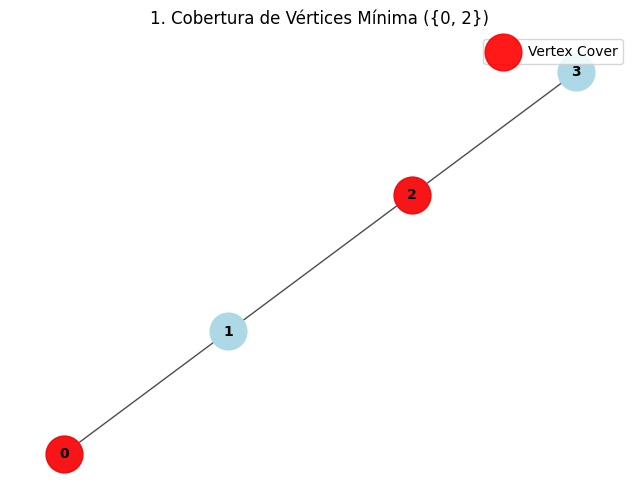

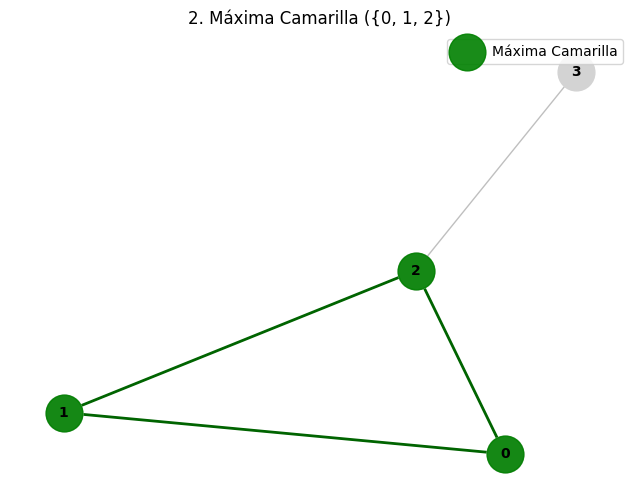

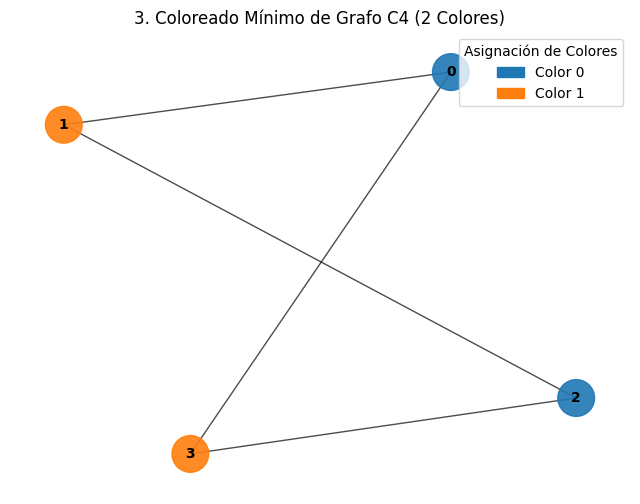

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# --- Funciones de Graficación ---

def plot_vertex_cover(G, vertex_cover_nodes, title="Grafo con Cobertura de Vértices"):
    """
    Grafica el grafo G y resalta los vértices en la Cobertura de Vértices.
    """
    pos = nx.spring_layout(G)

    plt.figure(figsize=(8, 6))

    # Dibujar todos los nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)

    # Resaltar los nodos en la Cobertura de Vértices (solución)
    nx.draw_networkx_nodes(G, pos, nodelist=vertex_cover_nodes,
                           node_color='red', node_size=700, alpha=0.9,
                           label='Vertex Cover')

    # Dibujar las aristas y etiquetas
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    plt.title(title)
    plt.axis('off')
    plt.legend()
    plt.show()

# ----------------------------------------------------------------------

def plot_maximum_clique(G, max_clique_nodes, title="Grafo con Máxima Camarilla"):
    """
    Grafica el grafo G y resalta los vértices y aristas de la Máxima Camarilla.
    """
    pos = nx.spring_layout(G)

    plt.figure(figsize=(8, 6))

    # Dibujar todos los nodos (sin resaltar)
    nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=700)

    # Resaltar los nodos de la Máxima Camarilla (solución)
    nx.draw_networkx_nodes(G, pos, nodelist=max_clique_nodes,
                           node_color='green', node_size=700, alpha=0.9,
                           label='Máxima Camarilla')

    # Dibujar todas las aristas
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')

    # Resaltar las aristas DENTRO de la Máxima Camarilla
    clique_subgraph = G.subgraph(max_clique_nodes)
    nx.draw_networkx_edges(clique_subgraph, pos, width=2.0, edge_color='darkgreen')

    # Dibujar las etiquetas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    plt.title(title)
    plt.axis('off')
    plt.legend()
    plt.show()

# ----------------------------------------------------------------------

def plot_graph_coloring(G, coloring, title="Grafo Coloreado"):
    """
    Grafica el grafo G con los nodos coloreados según la solución de k-coloreado.
    'coloring' es un diccionario {nodo: color_id}.
    """
    pos = nx.spring_layout(G)

    plt.figure(figsize=(8, 6))

    # 1. Preparación del mapa de colores
    unique_colors_ids = sorted(list(set(coloring.values())))
    num_colors = len(unique_colors_ids)

    # Obtener el mapa de colores base y crear un ListedColormap discreto
    # Esto soluciona el TypeError y la MatplotlibDeprecationWarning
    cmap_base = plt.colormaps.get_cmap('tab10')
    cmap = mcolors.ListedColormap(cmap_base.colors[:num_colors])

    # Mapear color_id a colores de Matplotlib usando el índice del mapa
    node_colors_map = {node: cmap(color_id) for node, color_id in coloring.items()}
    node_color_list = [node_colors_map[node] for node in G.nodes()]

    # Dibujar nodos y aristas
    nx.draw_networkx_nodes(G, pos, node_color=node_color_list, node_size=700, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='black')

    # 2. Leyenda para los colores (usa mpatches.Patch)
    patches = []
    for i, color_id in enumerate(unique_colors_ids):
        # Crear la leyenda usando mpatches.Patch (la corrección del AttributeError)
        patches.append(mpatches.Patch(color=cmap(color_id), label=f'Color {color_id}'))

    plt.legend(handles=patches, title="Asignación de Colores")

    plt.title(title)
    plt.axis('off')
    plt.show()

# ======================================================================
# EJECUCIÓN DE LOS EJEMPLOS (Soluciones encontradas en los códigos QUBO/Decisión)
# ======================================================================

# 1. VERTEX COVER (Grafo de Camino 0-1-2-3)
G_vc = nx.Graph()
G_vc.add_edges_from([(0, 1), (1, 2), (2, 3)])
vertex_cover_solution = [0, 2]
plot_vertex_cover(G_vc, vertex_cover_solution, "1. Cobertura de Vértices Mínima ({0, 2})")


# 2. MAXIMUM CLIQUE (Grafo Diamante con Máxima Camarilla {0, 1, 2})
G_mc = nx.Graph()
G_mc.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3)])
max_clique_solution = [0, 1, 2]
plot_maximum_clique(G_mc, max_clique_solution, "2. Máxima Camarilla ({0, 1, 2})")


# 3. GRAPH COLORING (Grafo Ciclo C4 con Chi(G)=2)
G_cc = nx.cycle_graph(4)
# Solución de coloreado: nodos adyacentes tienen diferente color_id
coloring_solution = {0: 0, 1: 1, 2: 0, 3: 1}
plot_graph_coloring(G_cc, coloring_solution, "3. Coloreado Mínimo de Grafo C4 (2 Colores)")